In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager

sns.set(style = 'whitegrid')
path      = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (6, 4)

In [3]:
h = [100, 120, 130, 140, 150, 160, 170, 180, 190]
f = [200, 205, 210, 220, 230, 250, 270, 280, 285]

df = pd.DataFrame({'키' : h, '발크기' : f})

df['키'].corr(df['발크기'])

0.966126323516351

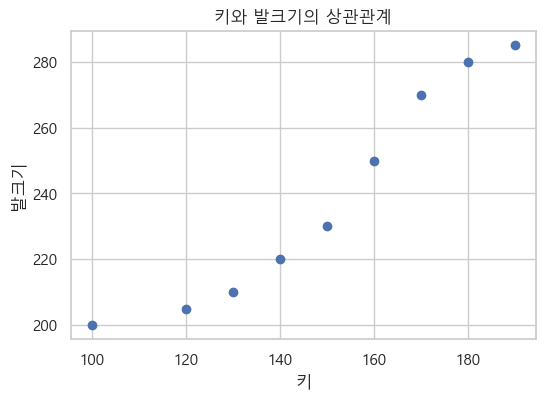

In [6]:
plt.scatter(df['키'], df['발크기'])
plt.title("키와 발크기의 상관관계")
plt.xlabel('키')
plt.ylabel('발크기')
plt.show()

-0.9888665950759702


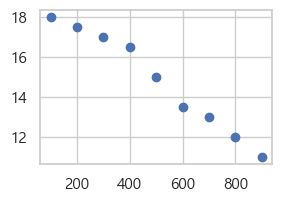

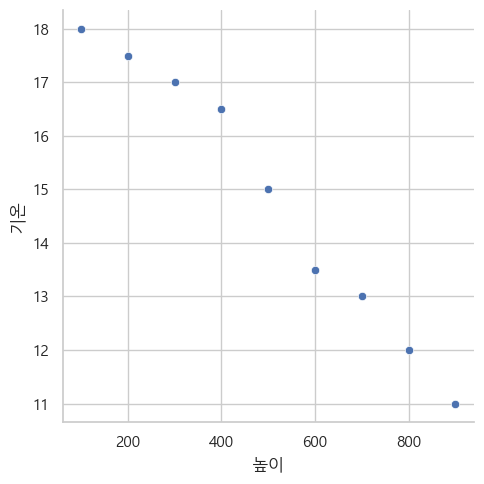

In [10]:
height = [100, 200, 300, 400, 500, 600, 700, 800, 900]
temper = [18.0, 17.5, 17.0, 16.5, 15.0, 13.5, 13.0, 12.0, 11.0]
plt.figure(figsize=(3, 2))
df2 = pd.DataFrame({'높이' : height, '기온' : temper})
print(df2['높이'].corr(df2['기온']))
print(plt.scatter(df2['높이'], df2['기온']))
print(sns.relplot(x = '높이', y = '기온', data = df2))
plt.show()


In [13]:
tips = sns.load_dataset('tips')
corr_tips = tips.corr()
corr_tips

C:\Users\Jinho\AppData\Local\Temp\ipykernel_6880\1940873938.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_tips = tips.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


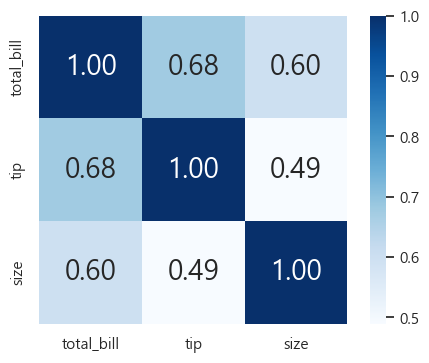

In [20]:
corr_heatmap = sns.heatmap(corr_tips, cbar = True, annot = True, annot_kws = {'size' : 20}, fmt = ".2f", square = True, cmap = 'Blues')

In [83]:
x1 = np.random.rand(1000)
x2 = np.random.rand(1000)

df = pd.DataFrame({'x1' : x1, 'x2' : x2})
df['x1'].corr(df['x2'])

0.024160635647294686

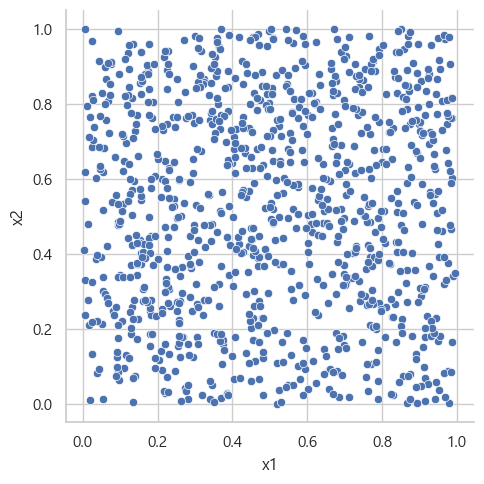

In [85]:
sns.relplot(x = 'x1', y = 'x2', data = df)